<a href="https://colab.research.google.com/github/tkdforever18/Carlos/blob/main/Proyecto_Eq_2_Frequent_patterns_%26_Association_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = '/content/drive/MyDrive/Data mining/Challenge_4y5 clean.xlsx'

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
df = pd.read_excel(path)
df

,Cliente,Producto,sem44,sem43,sem42,sem41
0,500000055,BEBIDAS REFRESCANTES,0.422700,0.422700,0.000000,0.422700
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,8.601600,6.065500,12.680500,8.601600
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,26.770000,22.895300,46.847499,30.292399
3,500000055,LECHE UHT SABORIZADA,0.140900,0.105700,0.000000,0.140900
4,500000055,COLAS LIGHT INDIVIDUAL,0.000000,1.268000,2.536000,1.268000
...,...,...,...,...,...,...
999995,500257111,COLAS REGULAR FAMILIAR NO RETORNABLE,43.677199,21.838600,70.094898,28.531100
999996,500257111,COLAS REGULAR FAMILIAR RETORNABLE,89.820498,47.199799,128.214397,63.050498
999997,500257111,AGUA PURIFICADA FAMILIAR,3.522400,0.000000,3.522400,0.000000
999998,500257111,LECHE UHT SABORIZADA,0.000000,0.000000,0.140900,0.000000


## Agregamos el total de la suma de las semanas

In [ ]:
df['Total'] = df.iloc[:, 3:].sum(axis=1) #axis=0 is row; axis=1 is column. Here sum of 'row'
df

,Cliente,Producto,sem44,sem43,sem42,sem41,Total
0,500000055,BEBIDAS REFRESCANTES,0.422700,0.422700,0.000000,0.422700,0.845400
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,8.601600,6.065500,12.680500,8.601600,27.347599
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,26.770000,22.895300,46.847499,30.292399,100.035198
3,500000055,LECHE UHT SABORIZADA,0.140900,0.105700,0.000000,0.140900,0.246600
4,500000055,COLAS LIGHT INDIVIDUAL,0.000000,1.268000,2.536000,1.268000,5.072000
...,...,...,...,...,...,...,...
999995,500257111,COLAS REGULAR FAMILIAR NO RETORNABLE,43.677199,21.838600,70.094898,28.531100,120.464598
999996,500257111,COLAS REGULAR FAMILIAR RETORNABLE,89.820498,47.199799,128.214397,63.050498,238.464694
999997,500257111,AGUA PURIFICADA FAMILIAR,3.522400,0.000000,3.522400,0.000000,3.522400
999998,500257111,LECHE UHT SABORIZADA,0.000000,0.000000,0.140900,0.000000,0.140900


In [ ]:
df[['Cliente', 'Producto', 'Total']] # returns a dataframe

,Cliente,Producto,Total
0,500000055,BEBIDAS REFRESCANTES,0.845400
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,27.347599
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,100.035198
3,500000055,LECHE UHT SABORIZADA,0.246600
4,500000055,COLAS LIGHT INDIVIDUAL,5.072000
...,...,...,...
999995,500257111,COLAS REGULAR FAMILIAR NO RETORNABLE,120.464598
999996,500257111,COLAS REGULAR FAMILIAR RETORNABLE,238.464694
999997,500257111,AGUA PURIFICADA FAMILIAR,3.522400
999998,500257111,LECHE UHT SABORIZADA,0.140900


In [ ]:
import numpy as np

In [ ]:
df['Total'] = df['Total'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
df

,Cliente,Producto,sem44,sem43,sem42,sem41,Total
0,500000055,BEBIDAS REFRESCANTES,0.422700,0.422700,0.000000,0.422700,1
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,8.601600,6.065500,12.680500,8.601600,1
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,26.770000,22.895300,46.847499,30.292399,1
3,500000055,LECHE UHT SABORIZADA,0.140900,0.105700,0.000000,0.140900,1
4,500000055,COLAS LIGHT INDIVIDUAL,0.000000,1.268000,2.536000,1.268000,1
...,...,...,...,...,...,...,...
999995,500257111,COLAS REGULAR FAMILIAR NO RETORNABLE,43.677199,21.838600,70.094898,28.531100,1
999996,500257111,COLAS REGULAR FAMILIAR RETORNABLE,89.820498,47.199799,128.214397,63.050498,1
999997,500257111,AGUA PURIFICADA FAMILIAR,3.522400,0.000000,3.522400,0.000000,1
999998,500257111,LECHE UHT SABORIZADA,0.000000,0.000000,0.140900,0.000000,1


In [ ]:
x = pd.pivot_table(df, 
               index='Cliente',
               columns = 'Producto',
               fill_value = 0,
               values='Total'
               )
x

Producto,AGUA MINERAL FAMILIAR,AGUA MINERAL INDIVIDUAL,AGUA PURIFICADA FAMILIAR,AGUA PURIFICADA INDIVIDUAL,AGUA SABORIZADA INDIVIDUAL,BEBIDAS DE SOYA FAMILIAR,BEBIDAS DE SOYA INDIVIDUAL,BEBIDAS ENERGETICAS,BEBIDAS INFANTILES,BEBIDAS REFRESCANTES,...,JUGOS Y NECTARES HOGAR,LECHE UHT ESPECIALIZADA,LECHE UHT REGULAR,LECHE UHT SABORIZADA,NARANJADAS,SABORES REGULAR FAMILIAR NO RETORNABLE,SABORES REGULAR FAMILIAR RETORNABLE,SABORES REGULAR INDIVIDUAL NO RETORNABLE,SABORES REGULAR INDIVIDUAL RETORNABLE,TE
Cliente,,,,,,,,,,,,,,,,,,,,,
500000055,0,1,0,0,0,0,0,0,1,1,...,1,0,0,1,1,1,0,1,0,1
500000058,0,1,0,1,1,0,0,0,1,0,...,1,0,1,1,1,1,0,1,1,1
500000061,0,0,0,1,0,0,0,1,0,1,...,1,0,0,1,1,1,0,1,1,0
500000062,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,1,1,0,1,1,0
500000064,1,1,0,1,1,0,0,1,0,0,...,1,0,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500257098,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
500257100,0,1,1,1,0,0,1,0,1,1,...,1,0,0,1,1,1,1,1,1,1
500257103,0,1,1,1,0,0,1,0,0,1,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
from mlxtend.preprocessing import TransactionEncoder # mlxtend : machine learning extensions

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(x).transform(x)
te_ary

array([[ True,  True, False, ..., False, False, False],
       [ True,  True, False, ...,  True, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
#drop the member_names column, so it will not be part of the calculation 
basket_encode = x.reset_index().drop('Cliente', axis = 1)
basket_encode.columns

Index(['AGUA MINERAL FAMILIAR', 'AGUA MINERAL INDIVIDUAL',
       'AGUA PURIFICADA FAMILIAR', 'AGUA PURIFICADA INDIVIDUAL',
       'AGUA SABORIZADA INDIVIDUAL', 'BEBIDAS DE SOYA FAMILIAR',
       'BEBIDAS DE SOYA INDIVIDUAL', 'BEBIDAS ENERGETICAS',
       'BEBIDAS INFANTILES', 'BEBIDAS REFRESCANTES', 'COLAS LIGHT FAMILIAR',
       'COLAS LIGHT INDIVIDUAL', 'COLAS REGULAR FAMILIAR NO RETORNABLE',
       'COLAS REGULAR FAMILIAR RETORNABLE',
       'COLAS REGULAR INDIVIDUAL NO RETORNABLE',
       'COLAS REGULAR INDIVIDUAL RETORNABLE', 'ISOTONICOS',
       'JUGOS Y NECTARES HOGAR', 'LECHE UHT ESPECIALIZADA',
       'LECHE UHT REGULAR', 'LECHE UHT SABORIZADA', 'NARANJADAS',
       'SABORES REGULAR FAMILIAR NO RETORNABLE',
       'SABORES REGULAR FAMILIAR RETORNABLE',
       'SABORES REGULAR INDIVIDUAL NO RETORNABLE',
       'SABORES REGULAR INDIVIDUAL RETORNABLE', 'TE'],
      dtype='object', name='Producto')

## Run through apriori to show items that are frequently bought together it is here that we have to set the min_support to filter out least occuring items. otherwise, there will be too many itemsets to handle, so we chosed min_support = .3 = 30%

In [ ]:
frequent_items = apriori(basket_encode, min_support = 0.6, use_colnames = True).sort_values(by = 'support', ascending = False)
frequent_items

,support,itemsets
3,0.891721,(COLAS REGULAR INDIVIDUAL NO RETORNABLE)
4,0.885752,(COLAS REGULAR INDIVIDUAL RETORNABLE)
2,0.837122,(COLAS REGULAR FAMILIAR RETORNABLE)
1,0.814918,(COLAS REGULAR FAMILIAR NO RETORNABLE)
25,0.811797,"(COLAS REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR INDIVIDUAL RETORNABLE)"
21,0.793015,"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL RETORNABLE)"
15,0.784106,"(COLAS REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)"
8,0.780247,(SABORES REGULAR INDIVIDUAL NO RETORNABLE)
20,0.768459,"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE)"
29,0.756324,"(COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)"


## Association rules
set min lift threshold to be 1.1 in order to keep the higher lift and reduce dataset items

In [ ]:
rules = association_rules(frequent_items,
                          metric = 'lift',
                          min_threshold = 1.10
                          )

rules.sort_values('lift',ascending = False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
82,"(COLAS REGULAR FAMILIAR RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS REGULAR INDIVIDUAL RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",0.681239,0.750128,0.603530,0.885931,1.181040,0.092514,2.190535
85,"(COLAS REGULAR INDIVIDUAL RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)","(COLAS REGULAR FAMILIAR RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",0.750128,0.681239,0.603530,0.804570,1.181040,0.092514,1.631076
84,"(COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",0.718231,0.713694,0.603530,0.840301,1.177398,0.090934,1.792793
83,"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)","(COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",0.713694,0.718231,0.603530,0.845644,1.177398,0.090934,1.825446
73,(SABORES REGULAR INDIVIDUAL NO RETORNABLE),"(COLAS LIGHT INDIVIDUAL, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",0.780247,0.677214,0.616057,0.789567,1.165906,0.087663,1.533917
...,...,...,...,...,...,...,...,...,...
11,(COLAS REGULAR FAMILIAR NO RETORNABLE),"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",0.814918,0.768459,0.689680,0.846319,1.101320,0.063450,1.506636
79,(NARANJADAS),(COLAS REGULAR FAMILIAR RETORNABLE),0.658416,0.837122,0.606666,0.921402,1.100678,0.055491,2.072294
78,(COLAS REGULAR FAMILIAR RETORNABLE),(NARANJADAS),0.837122,0.658416,0.606666,0.724704,1.100678,0.055491,1.240789
77,(JUGOS Y NECTARES HOGAR),"(COLAS REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR INDIVIDUAL RETORNABLE)",0.681646,0.811797,0.608897,0.893275,1.100367,0.055539,1.763436


In [ ]:
final_basket = rules[["antecedents", "consequents", "support", "confidence", "lift", "conviction"]]
final_basket.sort_values('confidence', ascending = False)


,antecedents,consequents,support,confidence,lift,conviction
58,"(COLAS REGULAR FAMILIAR RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.617550,0.986064,1.105798,7.769519
26,"(COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.648000,0.985918,1.105635,7.689030
6,"(SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.694248,0.984712,1.104283,7.082797
51,"(COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.622569,0.984153,1.103656,6.832963
69,"(COLAS LIGHT INDIVIDUAL, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.616057,0.983136,1.102516,6.420887
...,...,...,...,...,...,...
33,(COLAS REGULAR INDIVIDUAL NO RETORNABLE),"(COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",0.648000,0.726684,1.105635,1.254024
78,(COLAS REGULAR FAMILIAR RETORNABLE),(NARANJADAS),0.606666,0.724704,1.100678,1.240789
54,(COLAS REGULAR INDIVIDUAL NO RETORNABLE),"(COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR NO RETORNABLE)",0.622569,0.698166,1.103656,1.217246
65,(COLAS REGULAR INDIVIDUAL NO RETORNABLE),"(COLAS REGULAR FAMILIAR RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",0.617550,0.692537,1.105798,1.215502


## We have several attributes in the dataframe. Lets look at the potential relation amongst confidence, lift and conviction through a scatterplot. This would give us an overview and general sensing of how itemsets (antecedents and consequents) are spread out.

## We can see that as lift and confidence increases, the conviction increases too. It seems that confidence has a stronger postive relationship with conviction. It is interesting to note that for itemsets with confidence higher than 0.85, there is a positive linear relationship between confidence and lift. However, we are not sure what the itemsets are. Next step is to filter and look at these items.

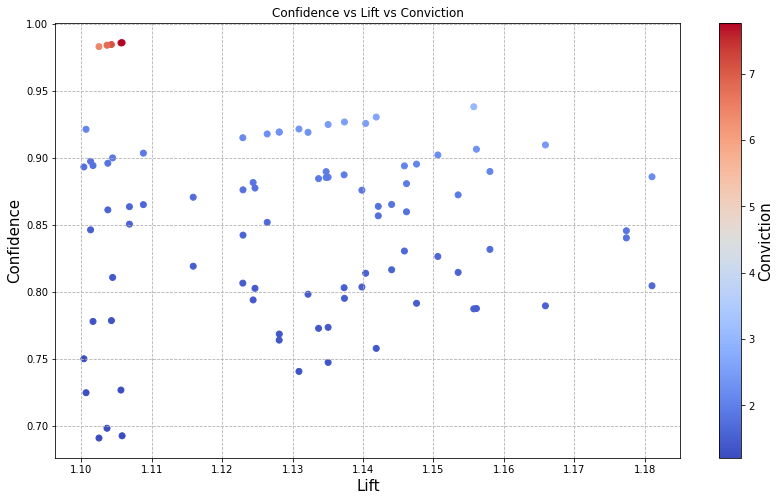

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (14,8))

color = final_basket.conviction.tolist()

plt.scatter(final_basket.lift, 
            final_basket.confidence,
            marker = "o", 
            linewidth = 1.0, 
            #alpha = 0.7, 
            c = color, 
            cmap = "coolwarm")

plt.grid(ls='dashed')

cbar = plt.colorbar()
cbar.set_label("Conviction", size = 15)

plt.xlabel("Lift", size = 15)
plt.ylabel("Confidence", size = 15)

plt.title("Confidence vs Lift vs Conviction")

plt.show()

We can see that it is those with itemsets having "COLAS REGULAR INDIVIDUAL NO RETORNABLE" as consequents. It seems that if we group the datasets by same consequent items, we are able to see a positive liner relationship. Next step is to conduct a facetgrid plot to confirm our prediction.

Filter itemsets with confidence greater than 0.9 and lift greater than 1.12

In [ ]:
basket_filter = final_basket.loc[((final_basket.confidence > 0.95) & (final_basket.lift > 1.10))].sort_values("conviction", ascending = False)
basket_filter


,antecedents,consequents,support,confidence,lift,conviction
58,"(COLAS REGULAR FAMILIAR RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.617550,0.986064,1.105798,7.769519
26,"(COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.648000,0.985918,1.105635,7.689030
6,"(SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.694248,0.984712,1.104283,7.082797
51,"(COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.622569,0.984153,1.103656,6.832963
69,"(COLAS LIGHT INDIVIDUAL, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.616057,0.983136,1.102516,6.420887


### Further Analysing the Data
####We need to convert frozen set into lists, add the coverted lists as columns to the end of the dataframe

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

final_basket.loc[:,"antecedent_list"] = [list(item) for item in final_basket["antecedents"]].copy()
final_basket.loc[:,"antecedent_list_1"] = [", ".join(item) for item in final_basket["antecedents"]].copy()

final_basket.loc[:,"consequent_list"] = [list(item) for item in final_basket["consequents"]].copy()
final_basket.loc[:,"consequent_list_1"] = [", ".join(item) for item in final_basket["consequent_list"]].copy()

final_basket.sort_values("conviction", ascending = False, inplace = True)
pd.options.display.max_colwidth = 1000
final_basket.head()

,antecedents,consequents,support,confidence,lift,conviction,antecedent_list,antecedent_list_1,consequent_list,consequent_list_1
58,"(COLAS REGULAR FAMILIAR RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.617550,0.986064,1.105798,7.769519,"[COLAS REGULAR FAMILIAR RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE]","COLAS REGULAR FAMILIAR RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE",[COLAS REGULAR INDIVIDUAL NO RETORNABLE],COLAS REGULAR INDIVIDUAL NO RETORNABLE
26,"(COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.648000,0.985918,1.105635,7.689030,"[COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE]","COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE",[COLAS REGULAR INDIVIDUAL NO RETORNABLE],COLAS REGULAR INDIVIDUAL NO RETORNABLE
6,"(SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.694248,0.984712,1.104283,7.082797,"[SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE]","SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE",[COLAS REGULAR INDIVIDUAL NO RETORNABLE],COLAS REGULAR INDIVIDUAL NO RETORNABLE
51,"(COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.622569,0.984153,1.103656,6.832963,"[COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR NO RETORNABLE]","COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR NO RETORNABLE",[COLAS REGULAR INDIVIDUAL NO RETORNABLE],COLAS REGULAR INDIVIDUAL NO RETORNABLE
69,"(COLAS LIGHT INDIVIDUAL, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.616057,0.983136,1.102516,6.420887,"[COLAS LIGHT INDIVIDUAL, SABORES REGULAR INDIVIDUAL NO RETORNABLE]","COLAS LIGHT INDIVIDUAL, SABORES REGULAR INDIVIDUAL NO RETORNABLE",[COLAS REGULAR INDIVIDUAL NO RETORNABLE],COLAS REGULAR INDIVIDUAL NO RETORNABLE


In [ ]:
Our hypothesis is true: data grouped by consequent items has a positive linear relationship between confidence, lift and conviction. However, we can see that consequent items whole milk, other vegetables, rolls/buns yogurt and soda dominates the data set. If we were to take items with only high conviction, the results will only be limited to itemsets with whole milk, other vegetables ans rolls/buns etc.

In [ ]:
#!pip install seaborn --upgrade

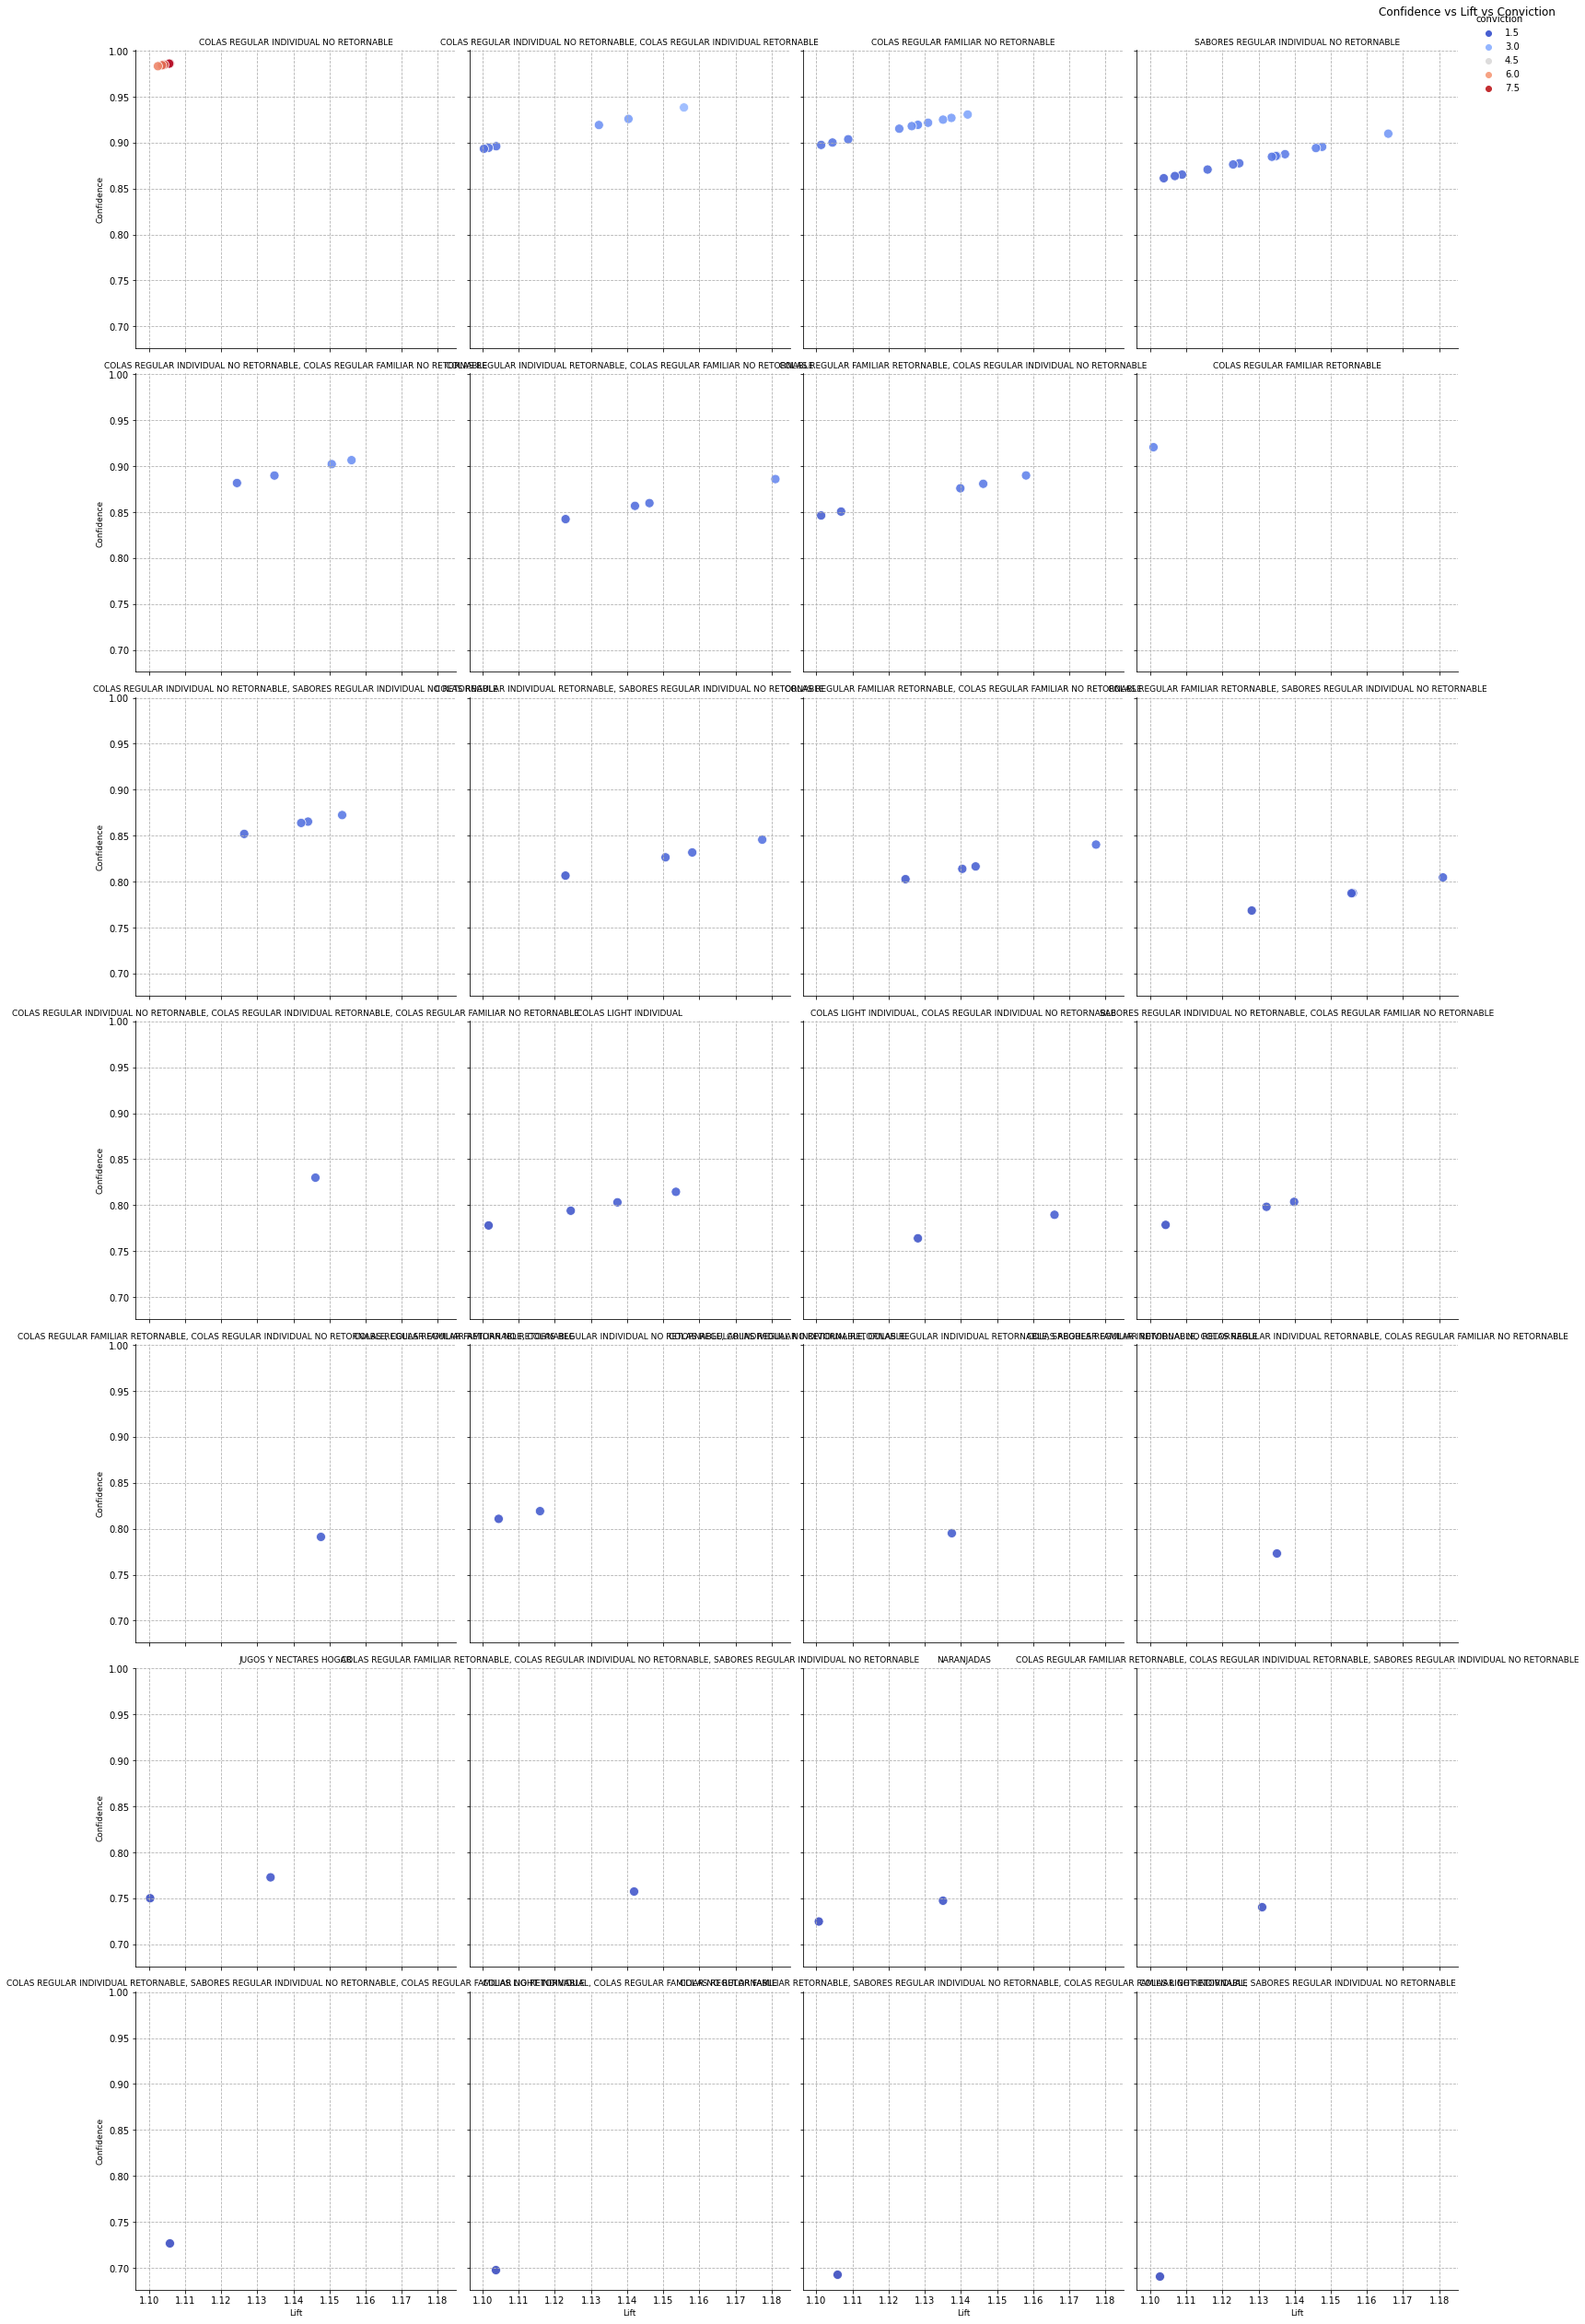

In [87]:
g = sns.relplot(data = final_basket, 
           x = "lift", y = "confidence", 
           col = "consequent_list_1", 
           col_wrap = 4, 
           hue = "conviction", 
           s = 100, 
           alpha = 0.9,
           palette = "coolwarm"
           )

axes = g.axes.flatten()

g.set_xlabels("Lift", size = 9)
g.set_ylabels("Confidence", size = 9)

title = final_basket["consequent_list_1"].unique().tolist()

#set grid style for all axes 
for i in range(len(title)):
    axes[i].grid(ls='dashed')
    axes[i].set_title(title[i], size = 9)

g.fig.suptitle('Confidence vs Lift vs Conviction', y = 1, x = 1)

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
# ajustar el espacio vertical en la parte superior de las gráficas


plt.tight_layout()
plt.show()

Putting it All Together
For our results be less skewed, we can take the following:

top 2 items of each consequent item category ordered by conviction, with conviction higher than 1.10.
top 1 items of each consequent item category ordered by conviction, with conviction lower than 1.10
Pick items with high conviction, as they will also have both high confidence and lift values

In [88]:
df_conviction = final_basket[final_basket.conviction >= 1.10]
df_conviction = df_conviction.groupby("consequent_list_1").head(2)
df_conviction.reset_index(inplace = True, drop = True)
df_conviction = df_conviction[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']]
df_conviction.sort_values("conviction", ascending = False)

,antecedents,consequents,support,confidence,lift,conviction
0,"(COLAS REGULAR FAMILIAR RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.617550,0.986064,1.105798,7.769519
1,"(COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL NO RETORNABLE),0.648000,0.985918,1.105635,7.689030
2,"(COLAS REGULAR FAMILIAR RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR INDIVIDUAL RETORNABLE)",0.639151,0.938219,1.155731,3.046298
3,"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",(COLAS REGULAR FAMILIAR NO RETORNABLE),0.617550,0.930539,1.141882,2.664570
4,"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)","(COLAS REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR INDIVIDUAL RETORNABLE)",0.660707,0.925758,1.140381,2.534982
5,"(COLAS REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",(COLAS REGULAR FAMILIAR NO RETORNABLE),0.648000,0.926863,1.137371,2.530642
6,"(COLAS LIGHT INDIVIDUAL, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",(SABORES REGULAR INDIVIDUAL NO RETORNABLE),0.616057,0.909694,1.165906,2.433429
7,"(COLAS REGULAR FAMILIAR RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",0.617550,0.906510,1.156107,2.309278
8,"(COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",0.648000,0.902216,1.150631,2.207878
9,"(COLAS REGULAR FAMILIAR RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS REGULAR INDIVIDUAL RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",0.603530,0.885931,1.181040,2.190535


There are 44 items after getting top 1 item grouped by consequents and orederd by conviction. To make results more readable we can group by antecedents.

Pick 1st antecedent - consequent pair, order by conviction descending

In [91]:
#order by consequents
df_first_item = final_basket.sort_values(["consequent_list_1", "conviction"], ascending = [True, False])
df_first_item = df_first_item.groupby("consequent_list_1").head(1)

df_first_item[["antecedents", "consequents", "support","confidence", "lift", "conviction"]].head(10)

,antecedents,consequents,support,confidence,lift,conviction
70,"(COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",(COLAS LIGHT INDIVIDUAL),0.616057,0.814542,1.153511,1.584500
54,(COLAS REGULAR INDIVIDUAL NO RETORNABLE),"(COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR NO RETORNABLE)",0.622569,0.698166,1.103656,1.217246
73,(SABORES REGULAR INDIVIDUAL NO RETORNABLE),"(COLAS LIGHT INDIVIDUAL, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",0.616057,0.789567,1.165906,1.533917
72,(COLAS REGULAR INDIVIDUAL NO RETORNABLE),"(COLAS LIGHT INDIVIDUAL, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",0.616057,0.690863,1.102516,1.207800
56,"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",(COLAS REGULAR FAMILIAR NO RETORNABLE),0.617550,0.930539,1.141882,2.664570
79,(NARANJADAS),(COLAS REGULAR FAMILIAR RETORNABLE),0.606666,0.921402,1.100678,2.072294
84,"(COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",0.603530,0.840301,1.177398,1.792793
40,"(COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",0.639151,0.889896,1.158028,2.102941
66,(SABORES REGULAR INDIVIDUAL NO RETORNABLE),"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",0.617550,0.791480,1.147604,1.488201
41,(SABORES REGULAR INDIVIDUAL NO RETORNABLE),"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR INDIVIDUAL RETORNABLE)",0.639151,0.819165,1.115894,1.470465


In [90]:
#order by antecedent 
df_first_item = df_first_item.sort_values(["antecedent_list_1", "conviction"], ascending = [True, False])
df_first_item[["antecedents", "consequents", "support","confidence", "lift", "conviction"]]

,antecedents,consequents,support,confidence,lift,conviction
71,(COLAS LIGHT INDIVIDUAL),"(COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",0.616057,0.872428,1.153511,1.910103
68,"(COLAS LIGHT INDIVIDUAL, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",(SABORES REGULAR INDIVIDUAL NO RETORNABLE),0.616057,0.909694,1.165906,2.433429
35,(COLAS REGULAR FAMILIAR NO RETORNABLE),"(COLAS REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",0.648000,0.795172,1.137371,1.468883
67,(COLAS REGULAR FAMILIAR NO RETORNABLE),"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",0.617550,0.757806,1.141882,1.388777
75,(COLAS REGULAR FAMILIAR NO RETORNABLE),(NARANJADAS),0.609017,0.747336,1.135052,1.351931
87,(COLAS REGULAR FAMILIAR NO RETORNABLE),"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",0.603530,0.740603,1.130910,1.330495
83,"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)","(COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",0.603530,0.845644,1.177398,1.825446
59,"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE)","(SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",0.617550,0.803621,1.139847,1.502067
56,"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",(COLAS REGULAR FAMILIAR NO RETORNABLE),0.617550,0.930539,1.141882,2.664570
38,"(COLAS REGULAR FAMILIAR RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR INDIVIDUAL RETORNABLE)",0.639151,0.938219,1.155731,3.046298


#### CONCLUSION
1. Colas regular no retornables individual, is the product which commonly is bought after buying any other product, so it is very important to have a freezer dedicated to this product in middle of all other products, the posibility to buy it after other product has been bought is very high, the conviction is extremely high above 7.

2. There is also very important to have Colas regular "retornables & No retornables" individual togheter, because many transactions shows that after buying any product, Colas regular "Retornables & No retornables" are bought togheter, despite the conviction is not as high as previous conclusion, it is the second largest conviction (higher than 3)

3. COLAS REGULAR FAMILIAR NO RETORNABLE, is also with very high conviction after buying (COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE) 

So at the end it is very hard to identify exactly which product has to be after other, because there are several combinations, and what we are very sure is that all "COLAS" presentations and "SABORES", must be all togheter because many transactions mention that they are commonly bought togheter. It may sound obvious, and Coca Cola Company knows it, but all colas & Sabores shouldn´t be separated.
